 <h1
    style="text-align: center; font-size: 30px; color: blue; font-weight: bold; ">
      Data Cleaning - New York City Airbnb Open Data
</h1>

## Project Overview
This project focuses on preparing the NYC Airbnb dataset for analysis through rigorous data cleaning processes. The goal is to transform raw listing data into a reliable, analysis-ready dataset.

In [106]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [107]:
# Read Data
df = pd.read_csv('D:/Internship Projects/Oasis_Infobyte/New York City Airbnb Open Data/NYC_data.csv')
df.shape

(48895, 16)

In [108]:
pd.concat([df.head(3),df.tail(3)])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Data Profiling

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [110]:
#exploring the unique values of each column  
df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [111]:
# Identify columns with missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [112]:
df.duplicated().sum()

0

In [113]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,08-06-2015,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,01-01-2015,0.02,1,0
5975,4370230,NaN,22686810,MichaÃ«l,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,02-01-2016,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,05-01-2016,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [114]:
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,08-07-2019,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,02-01-2017,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,23-05-2019,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,20-10-2015,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,19-06-2019,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,01-07-2015,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,19-06-2019,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,01-08-2015,0.02,1,0


### Impute missing numerical values with the median

In [115]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace= True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.72,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.72,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.72,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.72,6,2


In [116]:
# Replace missing categorical values with "Missing"
categorical_cols_with_missing_values = ['name', 'host_name', 'last_review']

for col in categorical_cols_with_missing_values:
    df[col] = df[col].fillna("Missing")

df.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19038,15122925,Sweet 2 Bedroom In South BK,15239415,Steven,Brooklyn,Bensonhurst,40.61238,-73.99805,Entire home/apt,100,3,54,13-06-2019,1.72,1,61


In [117]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [118]:
df.shape

(48895, 16)

In [119]:
df.select_dtypes(include = 'number').columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [120]:
df.select_dtypes(include='number').columns.size

10

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Outlier Detection

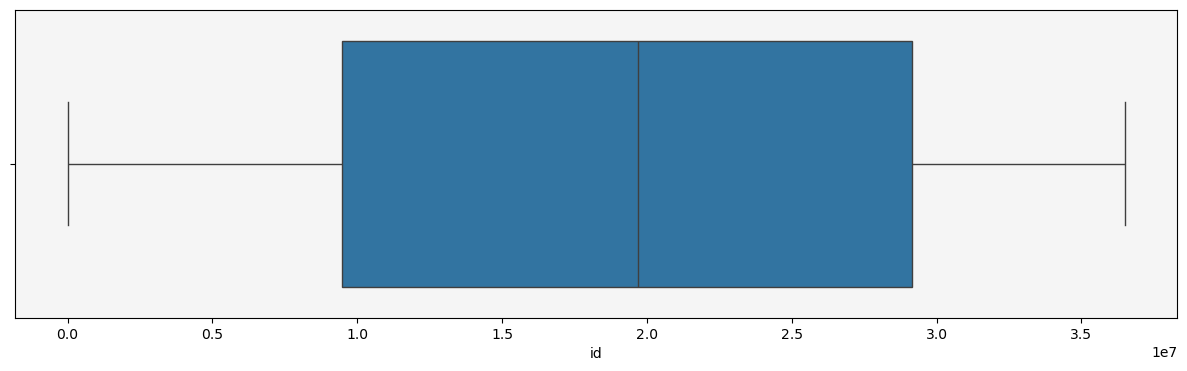

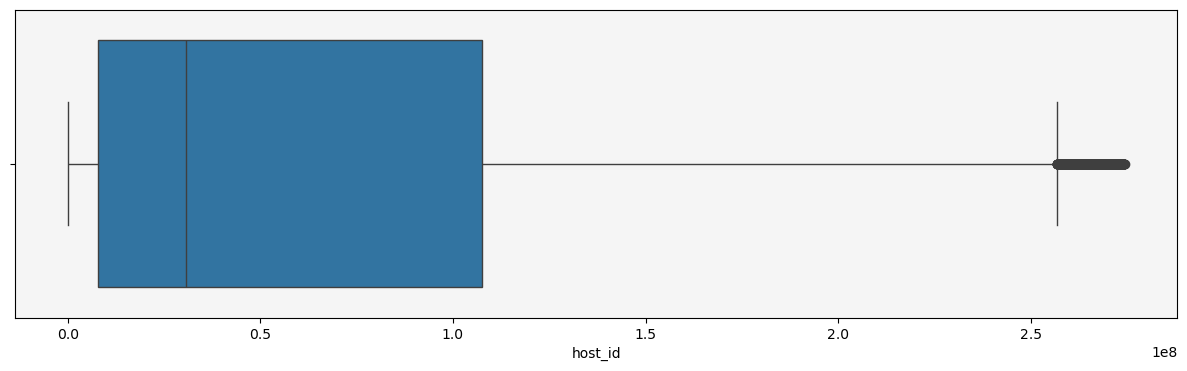

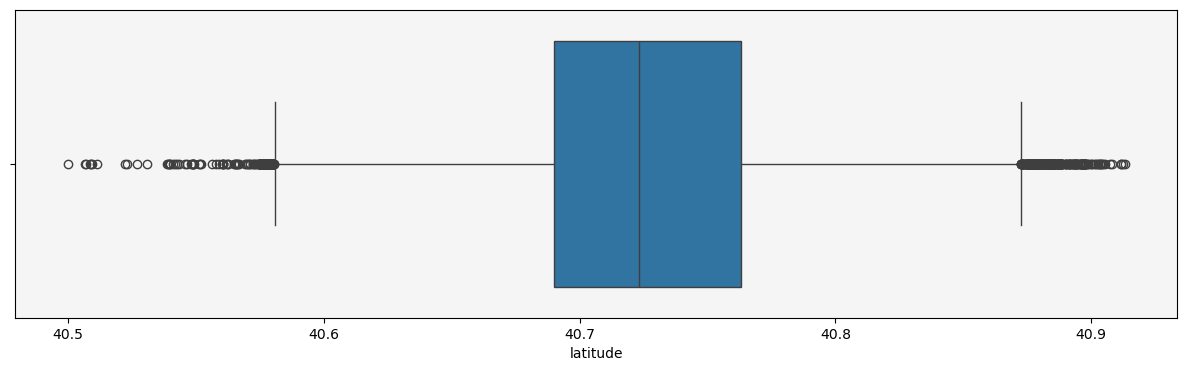

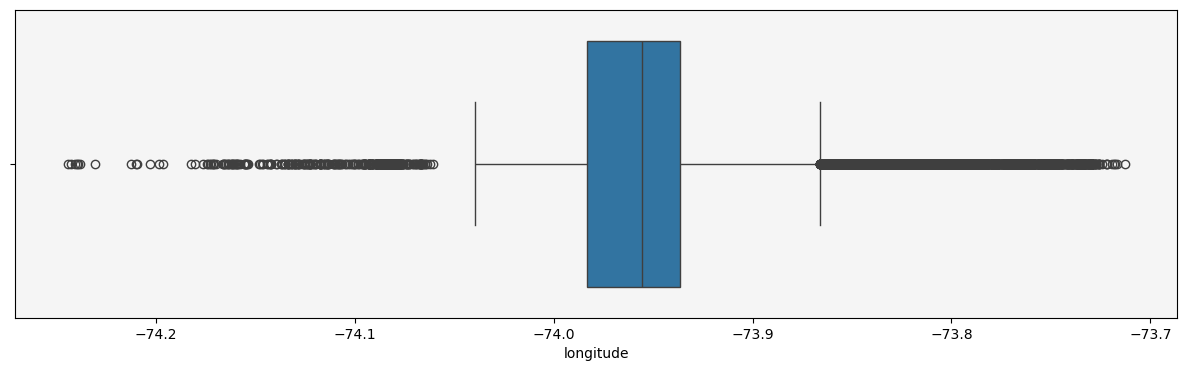

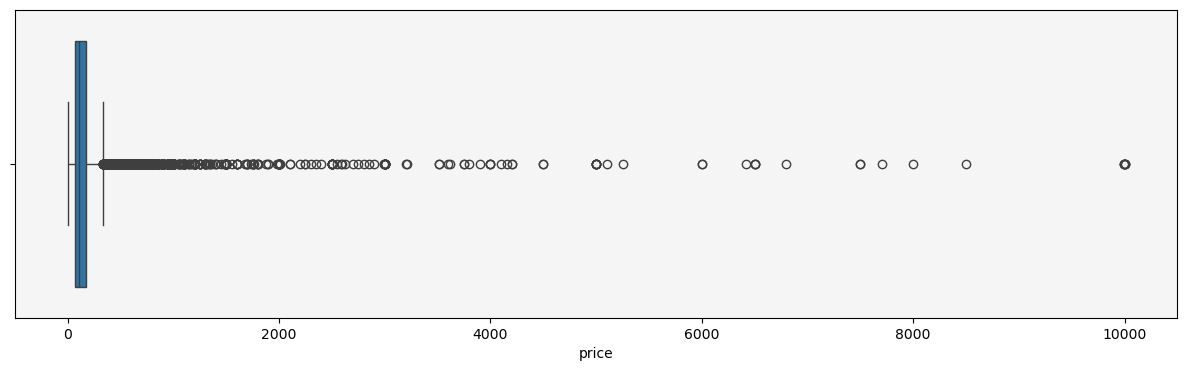

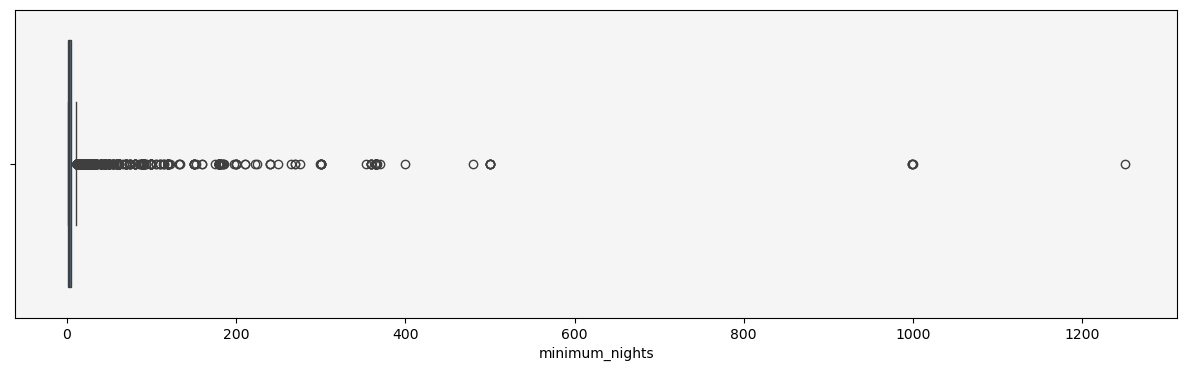

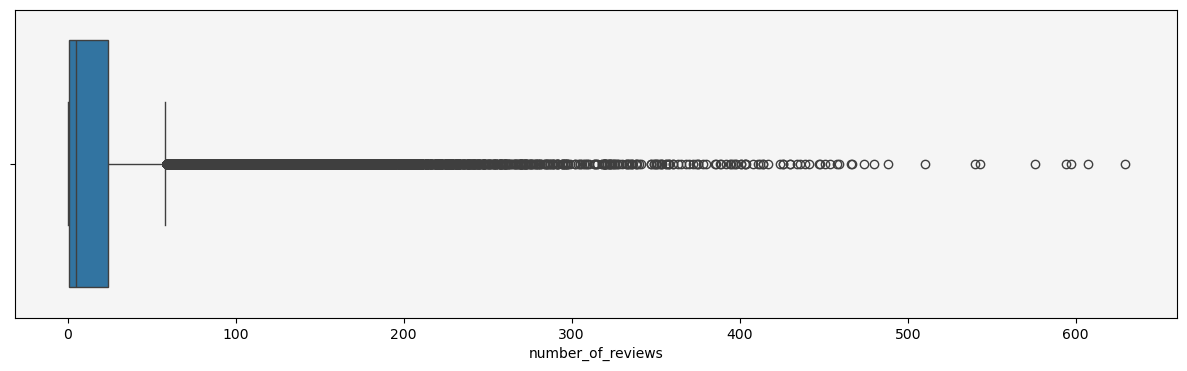

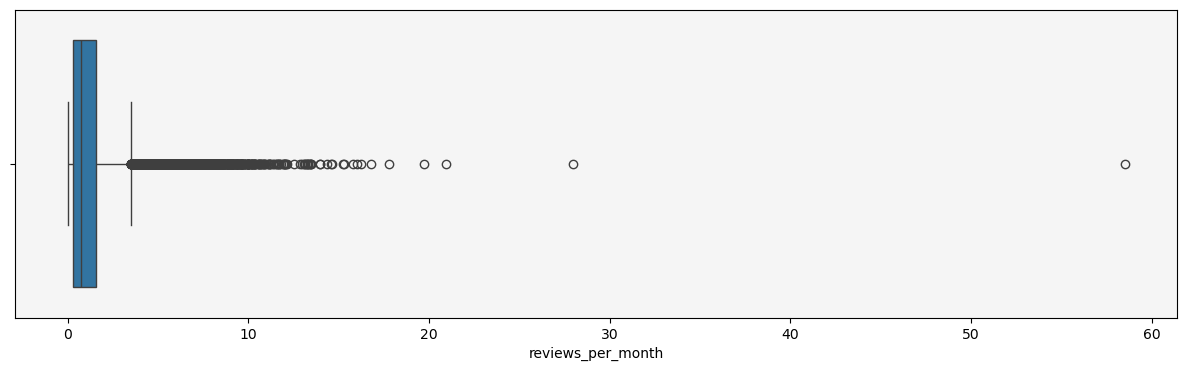

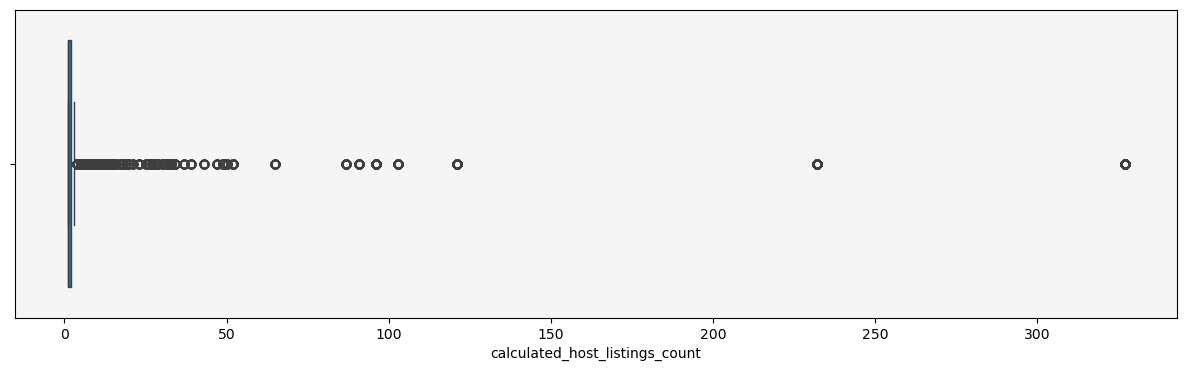

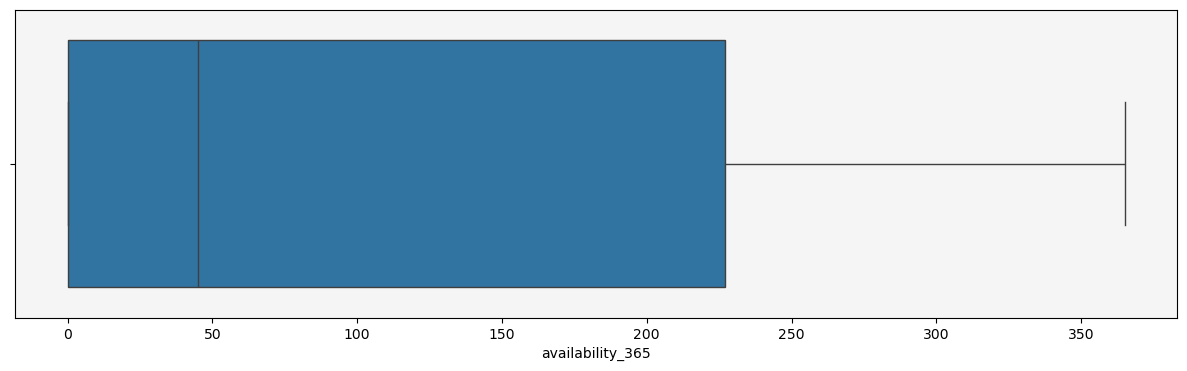

In [123]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(15, 4)) 
    ax = sns.boxplot(data=df, x=i)
    ax.set_facecolor('whitesmoke')
    plt.show()

#  Univariate Analysis

In [124]:
# Analyze Unique values for Categorical features
categorical_cols = df.select_dtypes(include = 'object').columns
df[categorical_cols].nunique()     

name                   47897
host_name              11453
neighbourhood_group        5
neighbourhood            221
room_type                  3
last_review             1765
dtype: int64

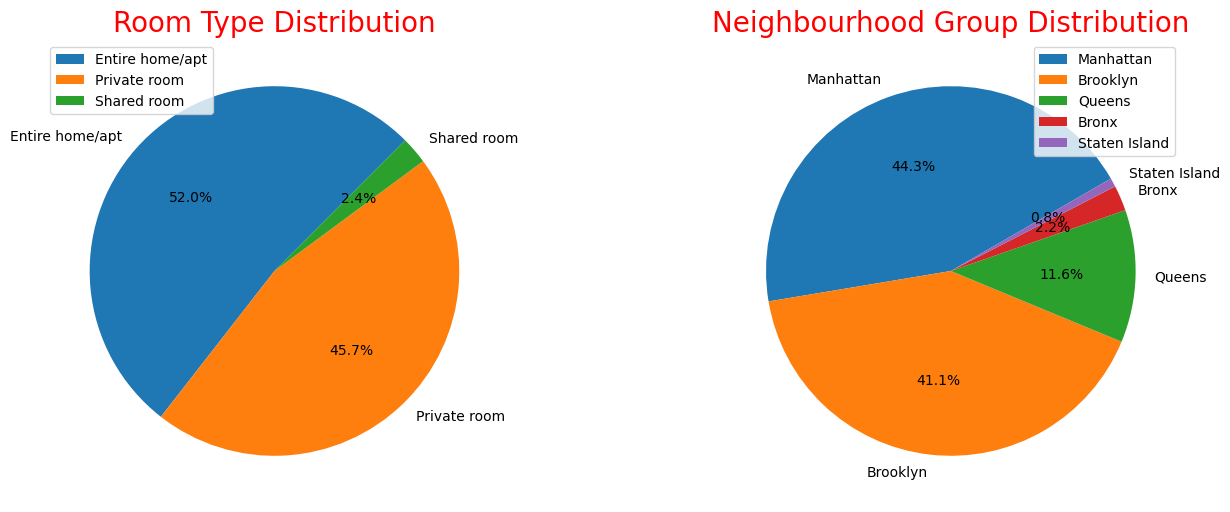

<Figure size 640x480 with 0 Axes>

In [125]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pie(df.room_type.value_counts(), labels= df.room_type.value_counts().index, autopct='%1.1f%%', startangle= 45)
plt.legend()
plt.title('Room Type Distribution',color="red",size = 20)

# Day Name
plt.subplot(1, 2, 2)
plt.pie(df.neighbourhood_group.value_counts(), labels= df.neighbourhood_group.value_counts().index, autopct='%1.1f%%', startangle= 30 )
plt.legend()
plt.title("Neighbourhood Group Distribution", color = "red", size = 20)
plt.show()

plt.tight_layout(pad=1.0)
plt.show()


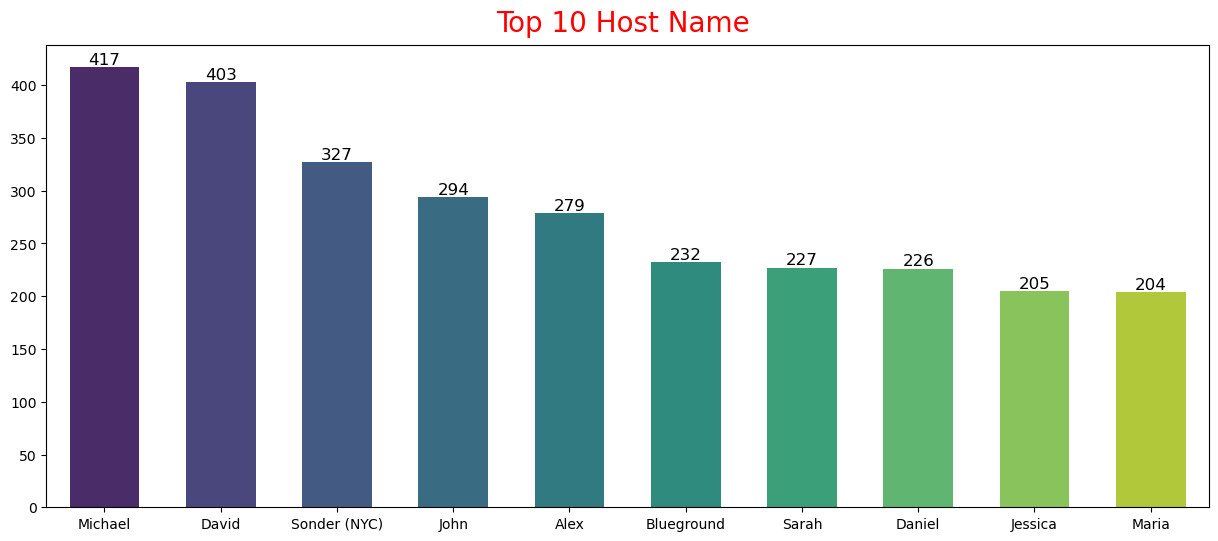

In [142]:
# Top 10 Host_name
top_hosts = df['host_name'].value_counts().head(10)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='viridis', width=0.6)
plt.title('Top 10 Host Name ',size = 20, color = 'red',pad =10)
for bar in ax.containers:
    ax.bar_label(bar, size = 12)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

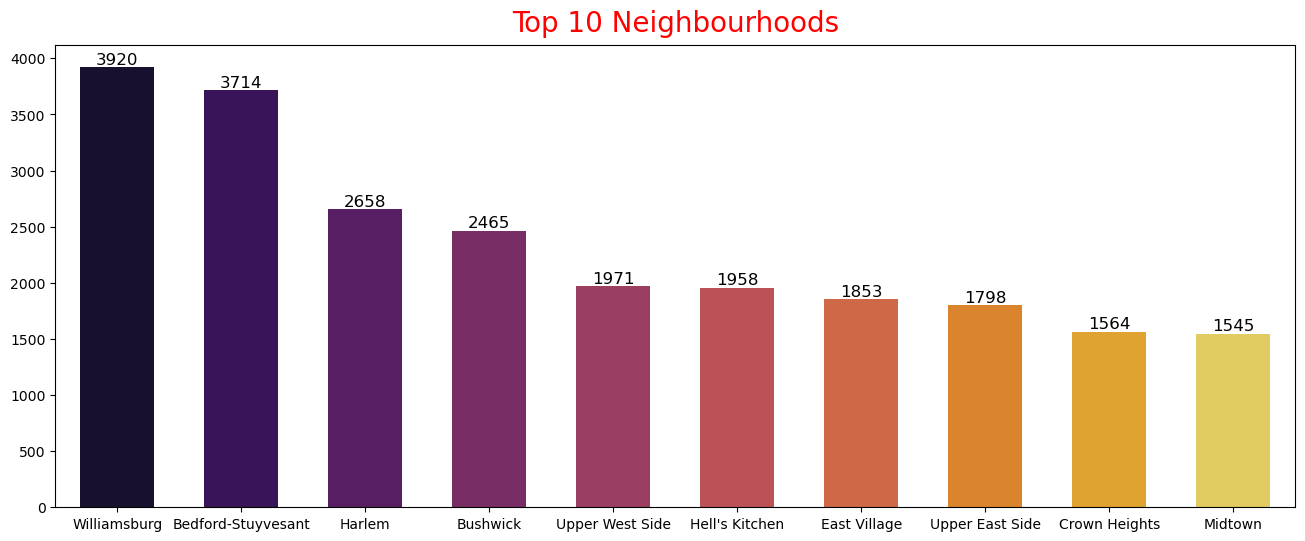

In [144]:
# Top 10 Neighbourhoos with most listings

top_neighbourhoods = df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette='inferno', width =0.6)
plt.title('Top 10 Neighbourhoods',size = 20, color = 'red',pad =10)
for bar in ax.containers:
    ax.bar_label(bar, size =12)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

# Bivariate Analysis

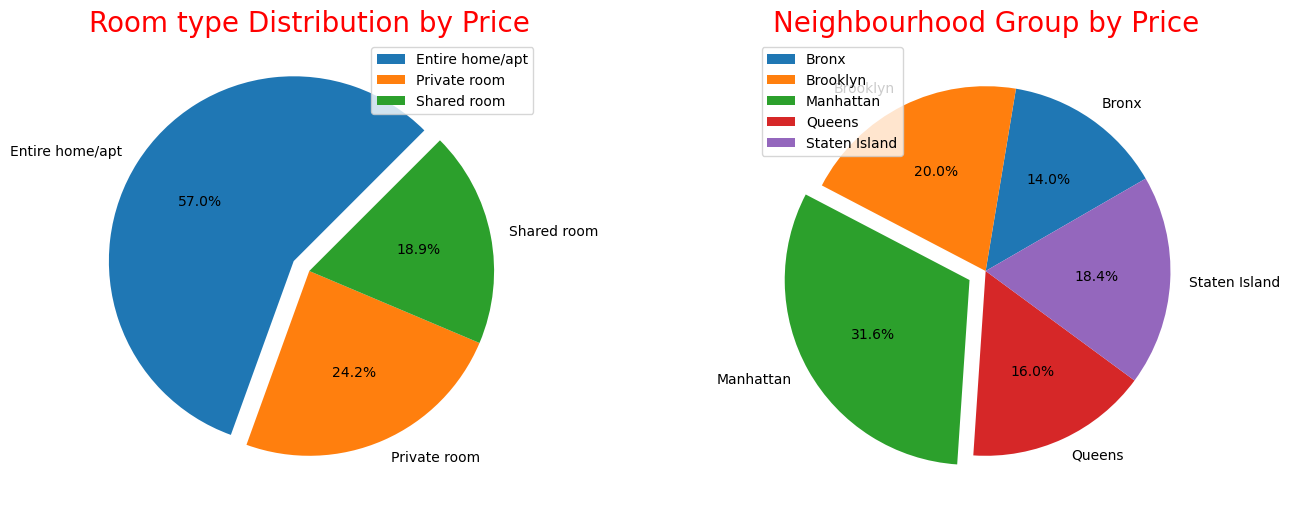

<Figure size 640x480 with 0 Axes>

In [154]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
room = df.groupby('room_type')['price'].mean()
plt.pie(room, labels=room.index, autopct='%1.1f%%', startangle= 45, explode =(0.1,0,0))
plt.legend()
plt.title('Room type Distribution by Price',color="red",size = 20)


plt.subplot(1, 2, 2)
n_gp= df.groupby('neighbourhood_group')['price'].mean()
plt.pie(n_gp, labels= n_gp.index, autopct='%1.1f%%', startangle= 30, explode=(0,0,0.1,0,0) )
plt.legend()
plt.title("Neighbourhood Group by Price", color = "red", size = 20)
plt.show()

plt.tight_layout(pad=1.0)
plt.show()

 # Multivariate Analysis

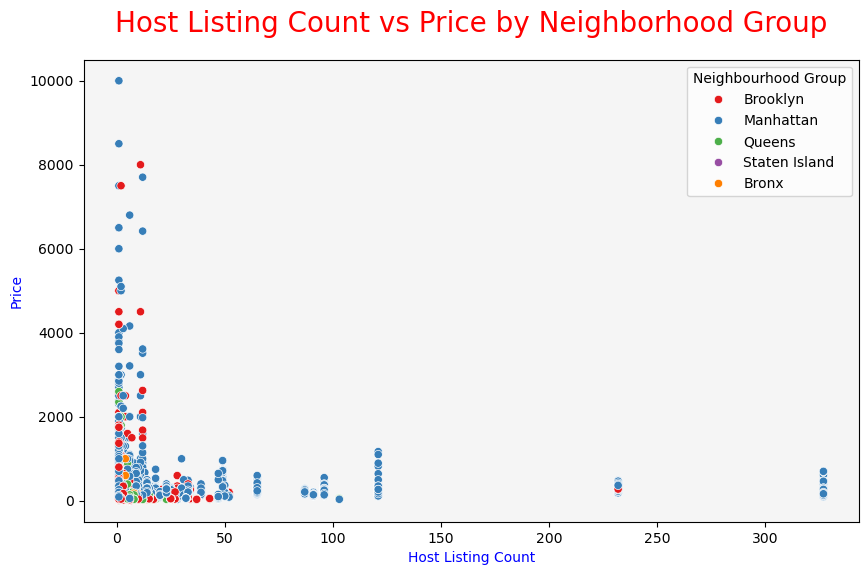

In [176]:

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='calculated_host_listings_count', y='price', hue='neighbourhood_group', palette='Set1')
plt.title('Host Listing Count vs Price by Neighborhood Group', color = "red", size = 20, pad = 20)
plt.xlabel('Host Listing Count', color = "blue")
ax.set_facecolor('whitesmoke')
plt.ylabel('Price', color = "blue")
plt.legend(title='Neighbourhood Group')
plt.show()

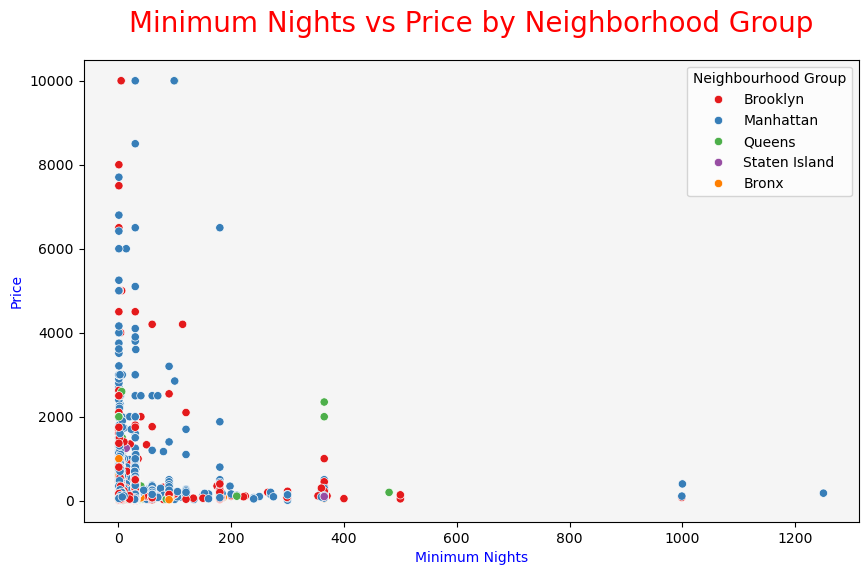

In [165]:

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='minimum_nights', y='price', hue='neighbourhood_group', palette='Set1')
plt.title('Minimum Nights vs Price by Neighborhood Group', color = "red", size = 20, pad = 20)
plt.xlabel('Minimum Nights', color = "blue")
ax.set_facecolor('whitesmoke')
plt.ylabel('Price', color = "blue")
plt.legend(title='Neighbourhood Group')
plt.show()    

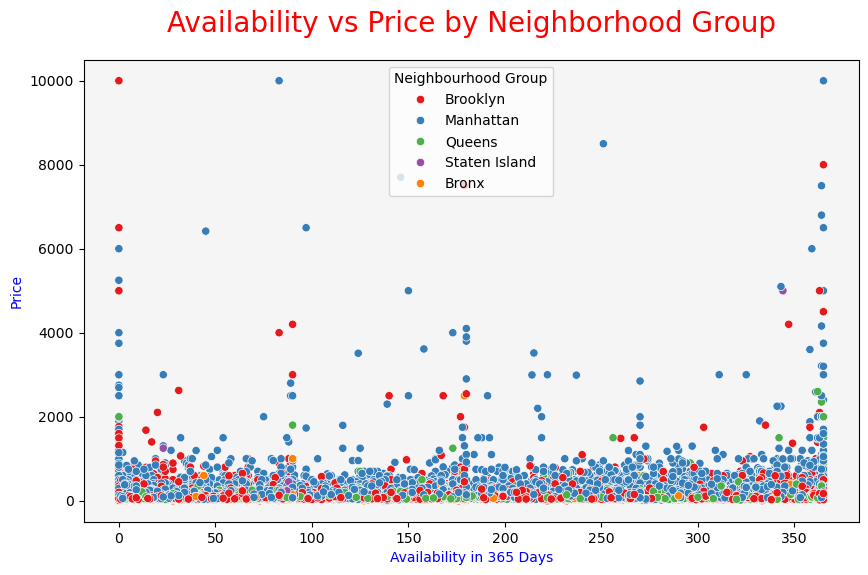

In [166]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='availability_365', y='price', hue='neighbourhood_group', palette='Set1')
plt.title('Availability vs Price by Neighborhood Group', color = "red", size = 20, pad = 20)
plt.xlabel('Availability in 365 Days', color = "blue")
ax.set_facecolor('whitesmoke')
plt.ylabel('Price', color = "blue")
plt.legend(title='Neighbourhood Group')
plt.show()  


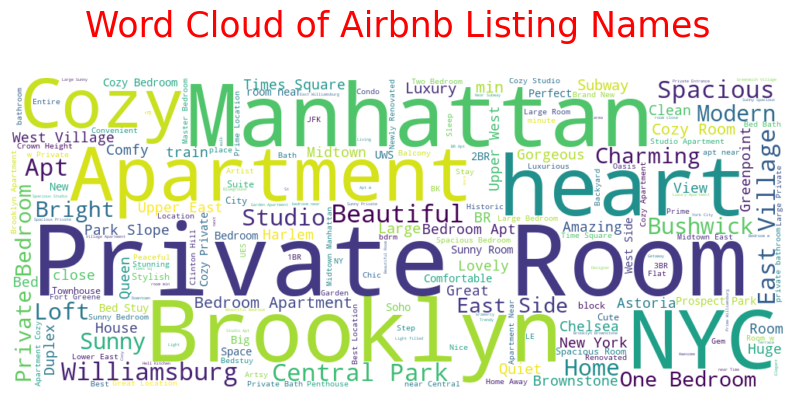

In [173]:
from wordcloud import WordCloud
plt.figure(figsize=(10, 6))

wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(' '.join(df['name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Airbnb Listing Names', size = 25, color= 'red' , pad = 30)
plt.show()

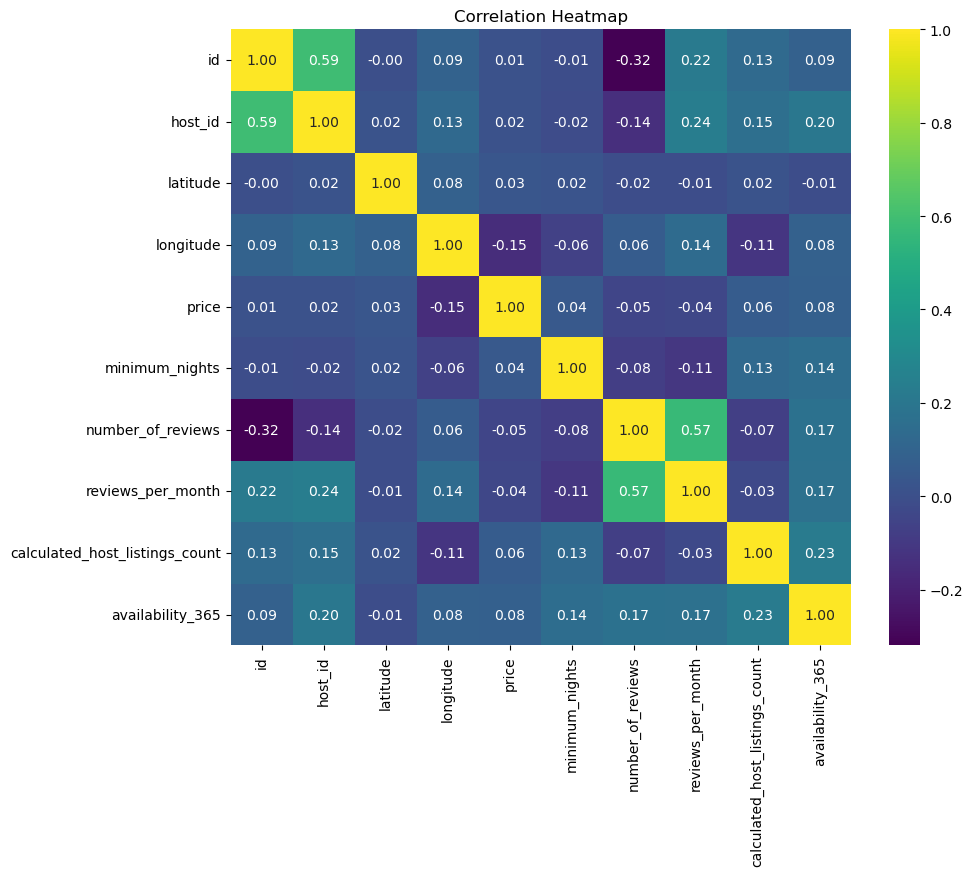

In [121]:
#Correlation Heatmap

numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#   Thank you   